# **Notes**

+ Info about rat positions on the video and recording channels
    + w628 -> Neuropix 0 & 1; RIGHT on the video ===>>> RAT 2
    + w627 -> Neuropix 2 & 3; LEFT on the video (cf stickers on the vid) ===>>> RAT 1
    <br>
    <br>
+ Remarque on precising path to package: <br>
    + *vpp* contains 2 packages: *video_processing* & *utils*. <br>
    + In this notebook we will use functions form modules in *utils*. To import these modules we need to add path to *vpp* folder to th paths where python will look for imports.
    + It is possible to verify that folder we need is within the considered paths with **sys.path** command
    <br>
    <br>
+ To convert nb to PDF:
https://nbconvert.readthedocs.io/en/latest/install.html

In [1]:
import os
import sys
import glob
sys.path.append(os.path.join(os.getcwd(),"vpp"))

In [2]:
from utils import plot_mvm, mvm2txt, chopOffTail, rescalingNOF, syncFileCreator, plot_mvm_rescaled
import re, shutil, glob

# **RAT 1 a.k.a. W627**

## INFO:
VIDEOS: 
**/media/data-116/Neuropixels Info/Videos/W627-W628/**

LFPs:
**/media/data-102/** & **/media/data-101/**

In [34]:

def rat_folder_creator(path, output_folder="/media/data-119/Maeva_mvm/Rat627/", rat_name = "627"):
    """
    path: path 628
    output_folder: parent folder for session-folders
    
    Creates a folders named Rat{rat_name}+{date}. Date is extracted from the name of video. 
    Creates a simlink to video in the new folder. 
    """
    #list all folder names in path
    folders = os.listdir(path)
    #print(folders)
    
    #create new folders in destination (output_folder)
    for f in folders:
        
        #replace 628 by 627 in folder name
        new_f = f.replace("628","627")
        
        #check whether the folder with session exists, if not create it
        if not os.path.isdir(os.path.join(output_folder,new_f)):
            os.mkdir(os.path.join(output_folder,new_f))
        else:
            shutil.rmtree(os.path.join(output_folder,new_f))
            os.mkdir(os.path.join(output_folder,new_f))
        
        
        #get *csv, *json and *mp4 from 628 folder
        files = glob.glob(os.path.join(path, f)+"/*", recursive=True)
        print(files)
        
        #copy files into 627 new_f
        for path2file in files:
            file = os.path.split(path2file)[1]
            
            #skip files that are not of interest
            if not (file.endswith("mp4") | file.endswith("csv") | file.endswith("json")):
                continue 
            
            #if it doesn't match the string, new_file will be the same as file (no error)
            new_file = file.replace("628","627")
            
            #create symlink for videos
            if os.path.islink(path2file):
                print(path2file)
                os.symlink(os.readlink(path2file),
                           os.path.join(output_folder, new_f, new_file))
            
            #or copy selected file from old path to new path
            else:
                shutil.copy(path2file, 
                            os.path.join(output_folder, new_f, new_file))
                 
#     # extract name of the video
#     try:
#         found = re.search('Basler_(.+?).mp4', path).group(1)
#     except AttributeError:
#         # AAA, ZZZ not found in the original string
#         found = ''  # apply your error handling------------------------

#     try:
#         date = re.search('__[0-9]+__(.+?)[0-9]{3}.mp4', path).group(1)
#     except AttributeError:
#         # AAA, ZZZ not found in the original string
#         date = ''  # apply your error handling------------------------

#     #name for the new folder
#     new_name = "Rat"+rat_name+"_"+date
#     path2newFolder = os.path.join(output_folder,new_name)
    
#     #print(os.path.join(path2newFolder, os.path.split(path)[1]))
    
#     # check whether the folder with session exists, if not create it
#     if not os.path.isdir(path2newFolder):
#         os.mkdir(path2newFolder)
#     else:
#         shutil.rmtree(path2newFolder)
#         os.mkdir(path2newFolder)

#     # symlink the video to new folder
#     os.symlink(src=path, dst=os.path.join(path2newFolder, os.path.split(path)[1]))

INFO## session 2 (1 is broken) of 15th of July

+ on the left => rat 1

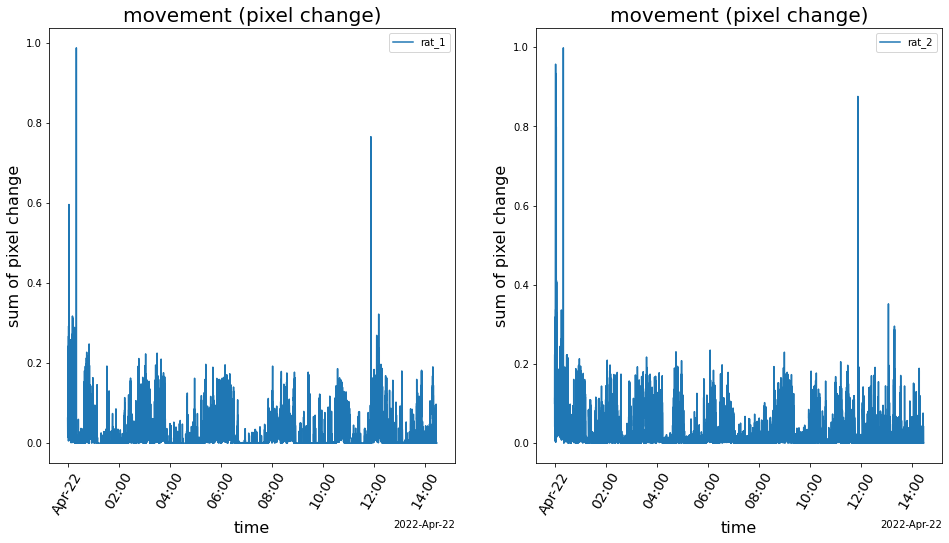

In [11]:
plot_mvm(path = os.path.join(w628_15, "acA1300-60gmNIR__21471690__20210715_185541853.csv"),
             resample_freq = '1S', #you can set resampling freq: '1T' for 1 minute
             plot_all = True,
             start={"hours": 1, "minutes": 25, "seconds": 0},
             dt={"hours": 0, "minutes": 10, "seconds": 0},
             ylim=1,
             save=False)

Video was recorded from second 2.8616.
Video duration: 51989.44
Sum of diffs: 51989.345199999996.
Video signal is 0.09480000000621658 seconds longer than sync_file, which corresponds to 2 number of frames
339 frames were deleted.
1.3189083497360945


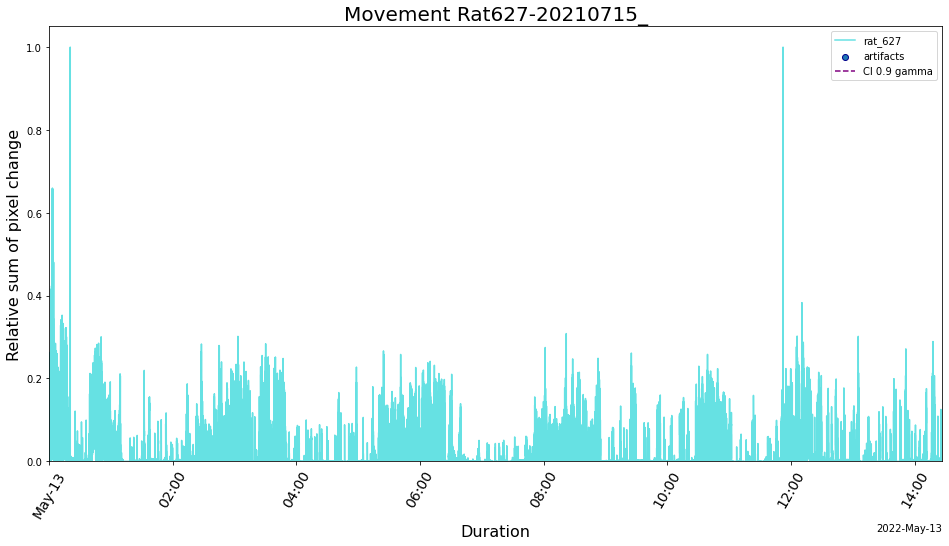

In [6]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210715_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-15_18-55-38/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-102/2021-07-15_18-55-38/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 1 of 16th of July


Video was recorded from second 3.2028.
Video duration: 25452.44
Sum of diffs: 25452.934799999995.
Video signal is -0.49479999999675783 seconds longer than sync_file, which corresponds to -12 number of frames
153 frames were deleted.
0.5849797765512713


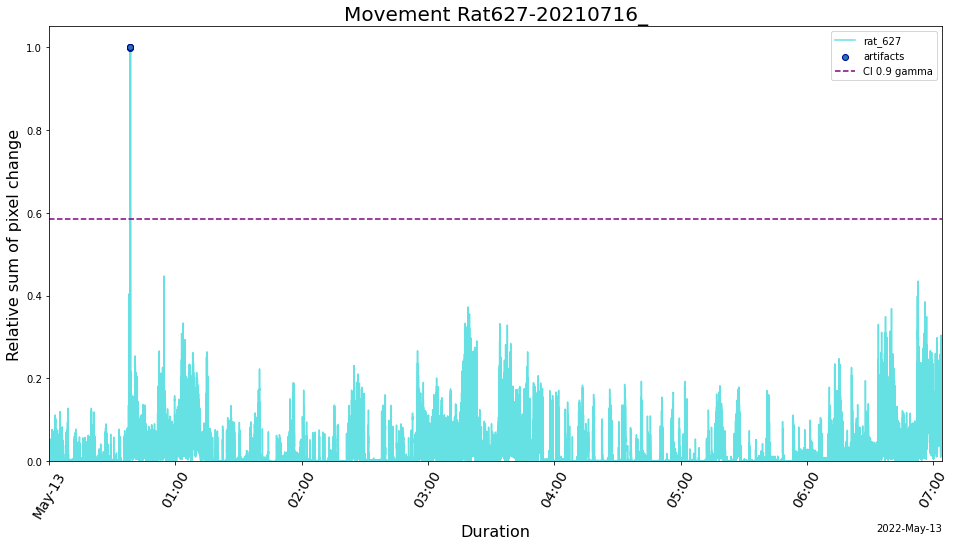

In [7]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210716_1/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-16_10-24-13/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-102/2021-07-16_10-24-13//RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 2 of 16th of July


Video was recorded from second 4.51.
Video duration: 47853.16
Sum of diffs: 47853.153999999995.
Video signal is 0.0060000000084983185 seconds longer than sync_file, which corresponds to 0 number of frames
312 frames were deleted.
1.4843737225934783


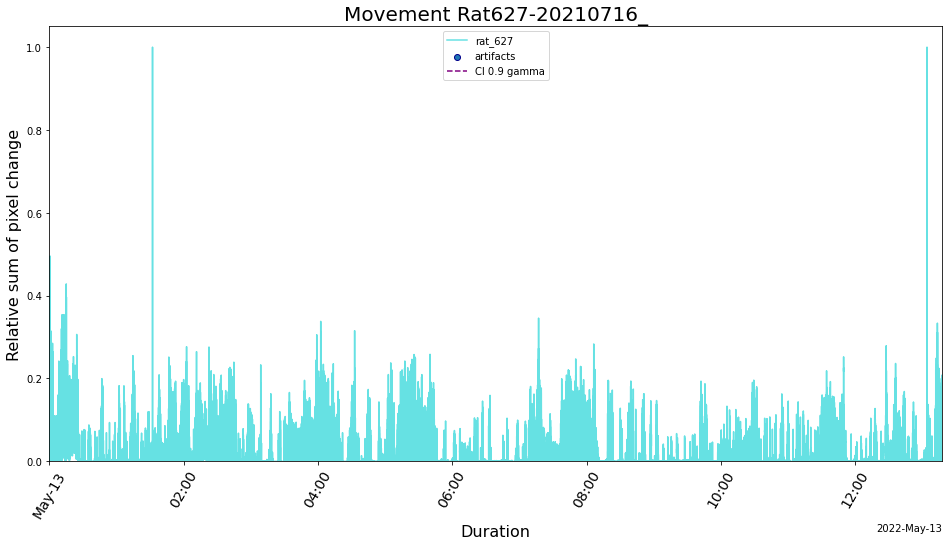

In [8]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210716_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-16_17-43-44/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-102/2021-07-16_17-43-44/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 1 of 17th of July


Video was recorded from second 47.4392.
Video duration: 41956.0
Sum of diffs: 41956.214.
Video signal is -0.2139999999999418 seconds longer than sync_file, which corresponds to -5 number of frames
268 frames were deleted.
1.3540673927663889


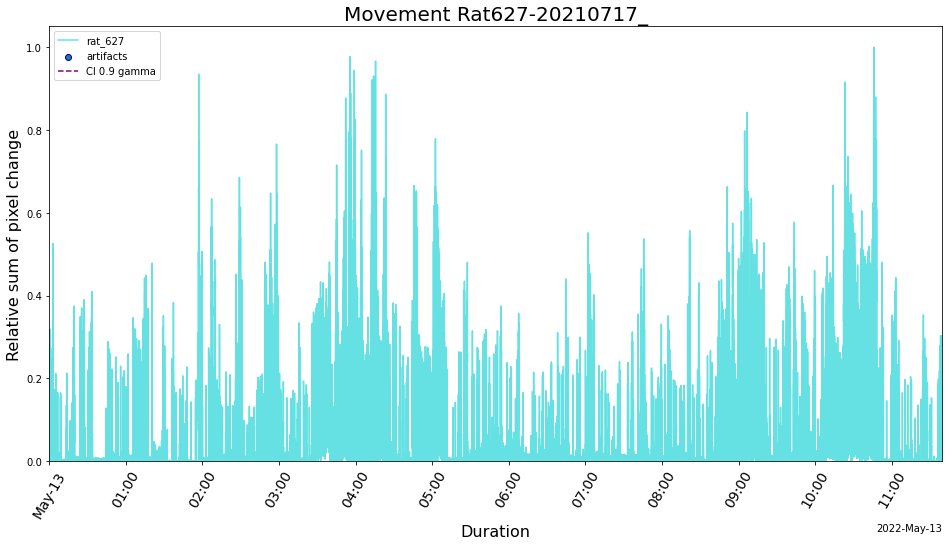

In [9]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210717_1//"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-17_07-09-45/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-102/2021-07-17_07-09-45/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 2 of 17th of July

Video was recorded from second 3.1676.
Video duration: 46712.24
Sum of diffs: 46712.2568.
Video signal is -0.016800000004877802 seconds longer than sync_file, which corresponds to 0 number of frames
310 frames were deleted.
1.4416312960437447


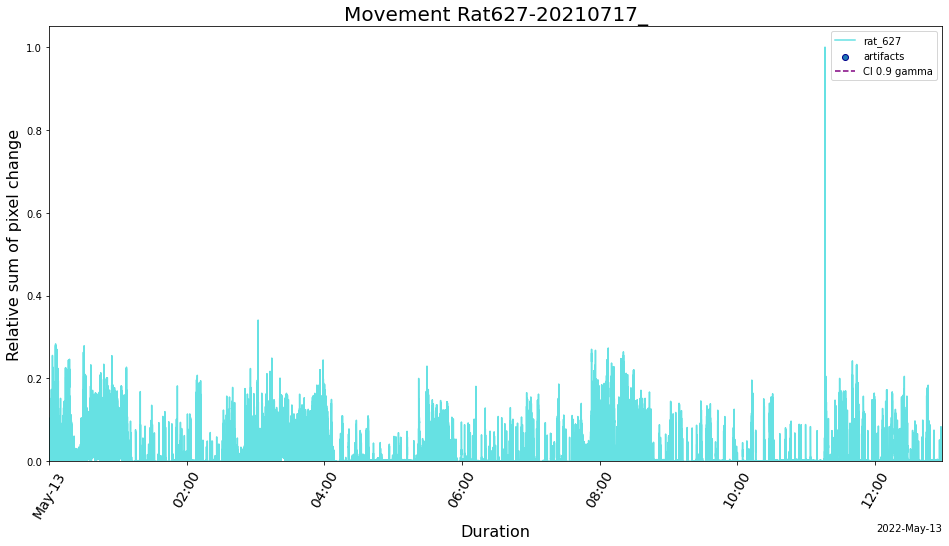

In [10]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210717_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-17_19-31-19/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-102/2021-07-17_19-31-19/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 1 of 18th of July

Video was recorded from second 63.5192.
Video duration: 38648.36
Sum of diffs: 38649.3084.
Video signal is -0.9484000000011292 seconds longer than sync_file, which corresponds to -23 number of frames
228 frames were deleted.
1.4685248318851236


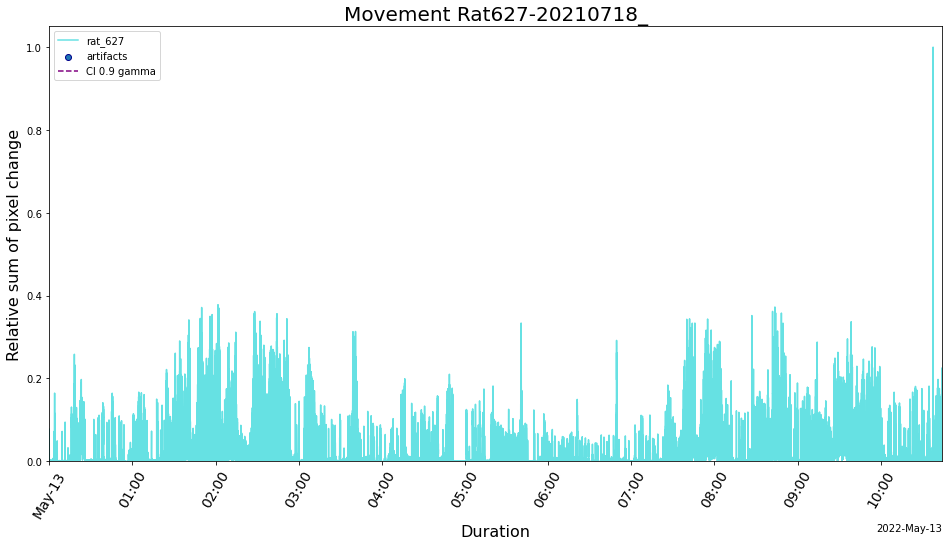

In [11]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210718_1/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-102/2021-07-18_08-37-09//RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-102/2021-07-18_08-37-09//RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 2 of 18th of July

Video was recorded from second 3.096.
Video duration: 43652.52
Sum of diffs: 43652.898.
Video signal is -0.37800000000424916 seconds longer than sync_file, which corresponds to -9 number of frames
275 frames were deleted.
1.5354428288804622


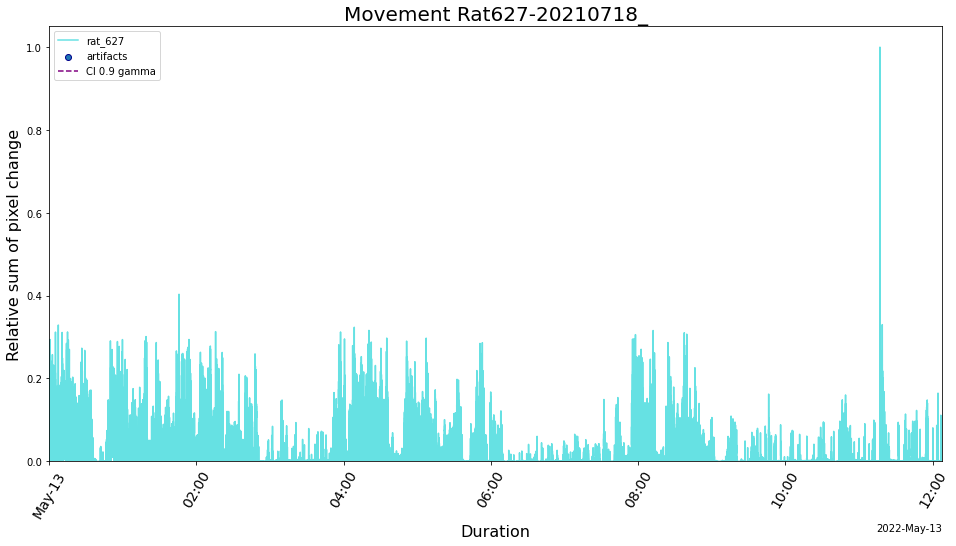

In [12]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210718_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-18_19-30-44/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-101/2021-07-18_19-30-44/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 1 of 19th of July

Video was recorded from second 50.5072.
Video duration: 36436.2
Sum of diffs: 36436.2116.
Video signal is -0.011600000005273614 seconds longer than sync_file, which corresponds to 0 number of frames
409 frames were deleted.
1.142773382614203


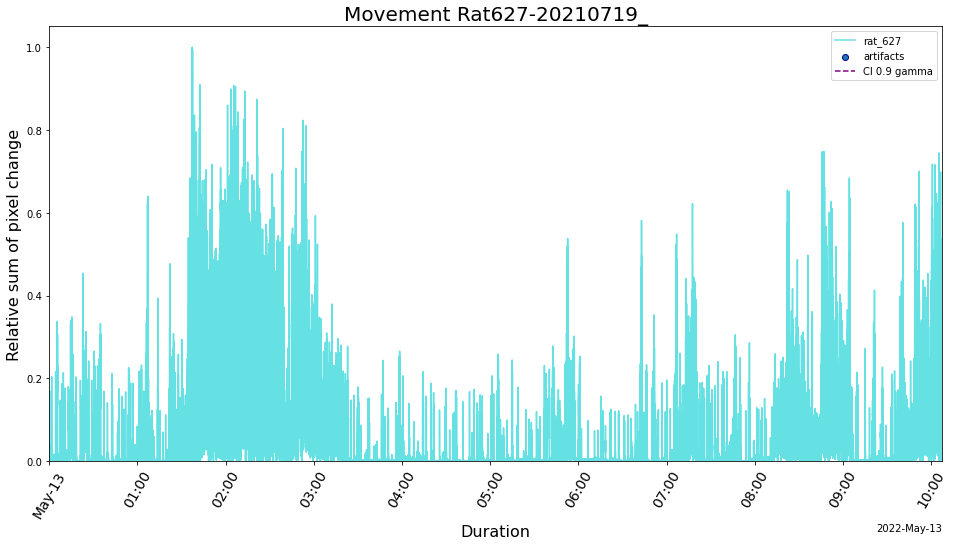

In [13]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210719_1/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-19_08-09-04/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-101/2021-07-19_08-09-04/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 2 of 19th of July

Video was recorded from second 26.956.
Video duration: 50504.44
Sum of diffs: 47900.97239999999.
Video signal is 2603.467600000011 seconds longer than sync_file, which corresponds to 65086 number of frames
313 frames were deleted.
1.0860859838933221


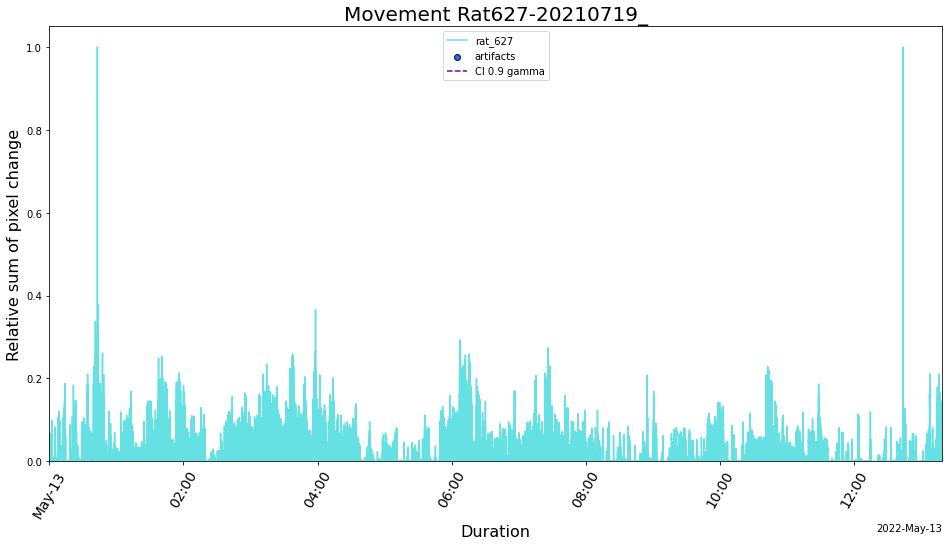

In [14]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210719_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-19_18-18-52/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-101/2021-07-19_18-18-52//RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

Rethink how much it should be considered as limit for over-running the LFP vs video. (this one is almost 1 sec)
+ consider coming back to it and correct it later.

## session 1 of 20th of July

Video was recorded from second 19.206.
Video duration: 41092.88
Sum of diffs: 41092.8232.
Video signal is 0.05679999999847496 seconds longer than sync_file, which corresponds to 1 number of frames
268 frames were deleted.
1.2760104591192798


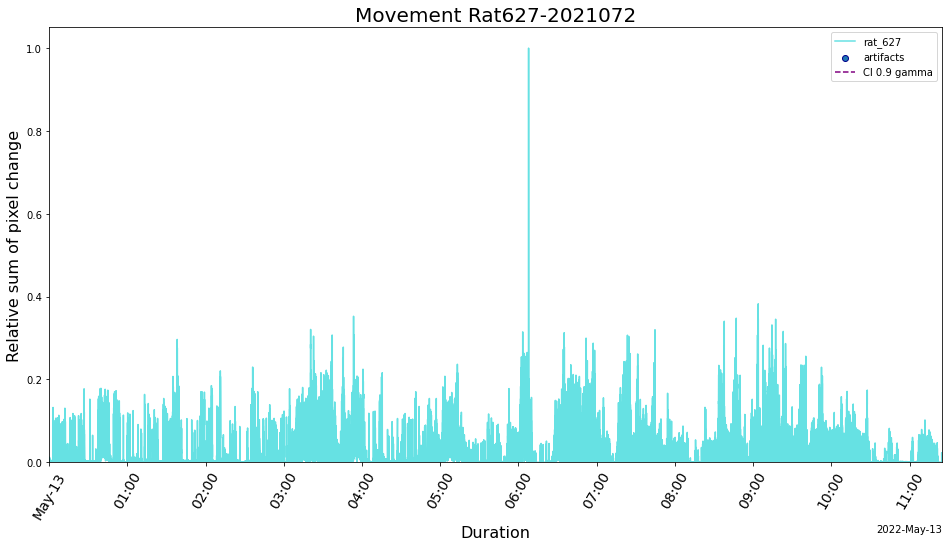

In [15]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210720/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-20_12-54-35/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-101/2021-07-20_12-54-35/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 1 of 21th of July

Video was recorded from second 33.888.
Video duration: 36679.88
Sum of diffs: 16026.391200000002.
Video signal is 20653.488799999996 seconds longer than sync_file, which corresponds to 516337 number of frames
104 frames were deleted.
1.8452873986691272


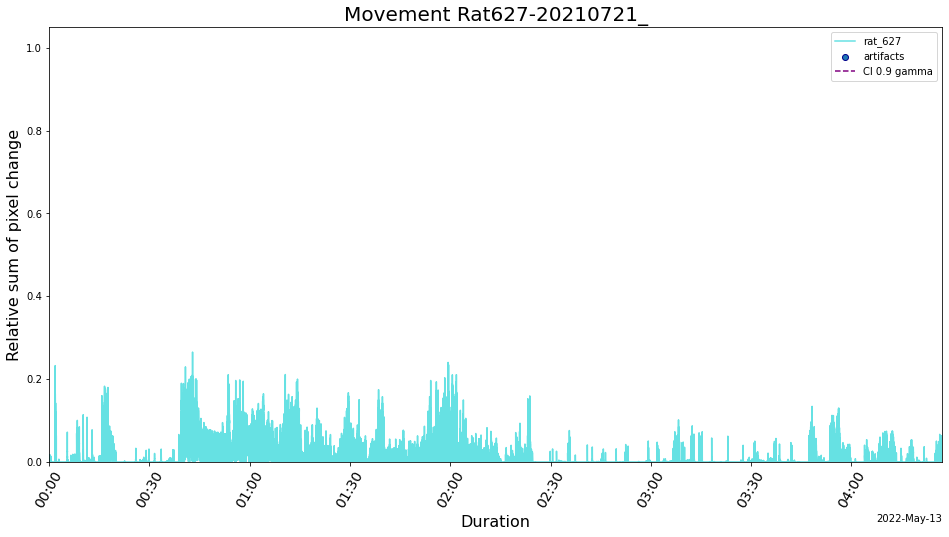

In [16]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210721_1/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-21_00-25-18/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-101/2021-07-21_00-25-18/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 2 of 21th of July

Video was recorded from second 6.9128.
Video duration: 43098.4
Sum of diffs: 43098.8232.
Video signal is -0.4231999999974505 seconds longer than sync_file, which corresponds to -10 number of frames
270 frames were deleted.
0.9380676594373892


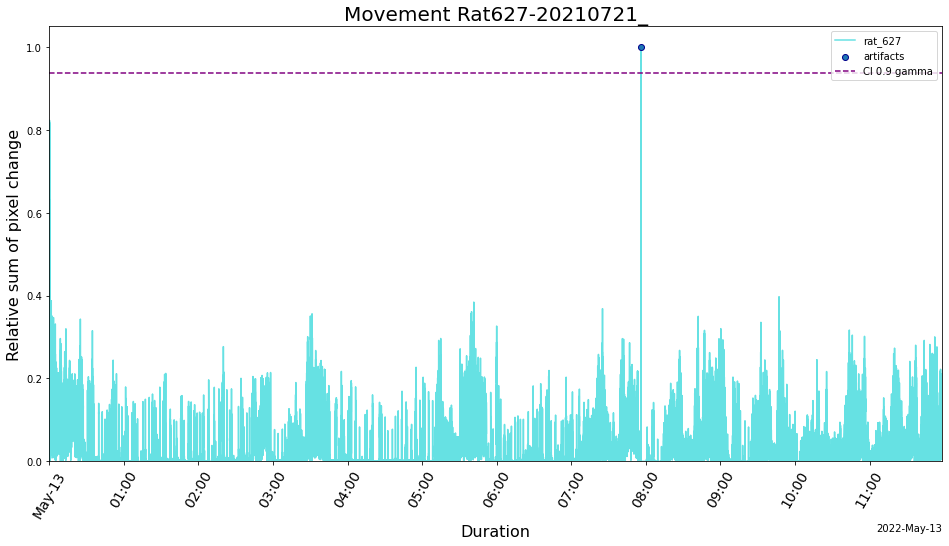

In [17]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210721_2/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-21_11-06-32/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-101/2021-07-21_11-06-32/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)

## session 3 of 21th of July

Video was recorded from second 33.7444.
Video duration: 41133.12
Sum of diffs: 41133.074.
Video signal is 0.046000000002095476 seconds longer than sync_file, which corresponds to 1 number of frames
268 frames were deleted.
1.0872936119097716


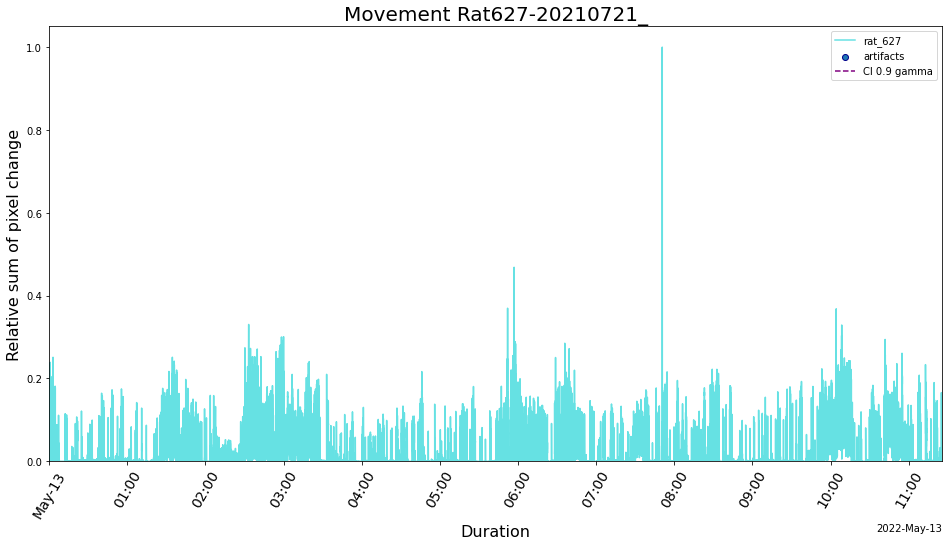

In [18]:
# ASSIGN SESSION FOLDER
w627 = "/media/data-119/Maeva_mvm/Rat627/Rat627-20210721_3/"

# 1) CREATE SYNC FILE
syncFileCreator(TTL2_folder = "/media/data-101/2021-07-21_23-11-38/RecordNode101/experiment1/recording1/events/Neuropix-PXI-100.3/TTL_4/",
            lfp_tmp_folder = "/media/data-101/2021-07-21_23-11-38/RecordNode101/experiment1/recording1/continuous/Neuropix-PXI-100.3/",
            output_sync_txt = w627)

# 2) EXPORT MOVEMENT TO TXT
mvm2txt(glob.glob(w627+"*.csv")[0],
        path2vid = glob.glob(w627+"*.mp4")[0],
        path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
        rat=1)

# 3) RESCALE NUMBER OF FRAMES
rescalingNOF(path2ephysTime = glob.glob(w627+"*_sec.txt")[0],
             path2mvm = glob.glob(w627+"*mvm.txt")[0],
             path2duration = glob.glob(w627+"*duration.txt")[0])

# 4) PLOT RESCALED MOVEMENT
plot_mvm_rescaled(path2duration = glob.glob(w627+"*duration_rescaled.txt")[0],
                  path2mvm = glob.glob(w627+"*mvm_rescaled.txt")[0],
                  f=25, plot_all = True, CIlim=0.90)